In [2]:
import sys
sys.path.append('lung_cancer_isbi18/src')

import numpy as np
import pandas as pd


In [4]:
## Load DL1 and DL2 scores
output_dl1 = '/home/shared/output/luna_v3.csv'
output_dl2 = '/home/shared/output/luna_dl2_v1_all.csv'

dl1 = pd.read_csv(output_dl1)
dl2 = pd.read_csv(output_dl2)

dl1 = dl1.rename(index=str, columns={"score": "score_dl1"})
dl2 = dl2.rename(index=str, columns={"score": "score_dl2"})

## Merge them to have them in the same df
output = dl1.merge(dl2.drop(['label', 'diameter'], 1), left_on=['patientid', 'nslice', 'x', 'y'], right_on= ['patientid', 'nslice', 'x', 'y'], 
                       how='left')

## Merge the train-test split 
test = '/media/shared/datasets/LUNA/CSVFILES/patients_test.txt'
patientsTest = []
with open(test, 'r') as f:
    for line in f:
        patientsTest.append(line.strip().replace('.npz', ''))

output['test'] = [ (p in patientsTest) for p in output.patientid]

## Delete 122 cases where the patients dont have the same roi in dl1 and dl2 --weird, btw
output = output[ np.isnan(output.score_dl2) == False]
output

,patientid,nslice,x,y,diameter,score_dl1,label,score_dl2,test
0,luna_614147706162329660656328811671,58,137,411,2.523,0.01380,0,0.00600,False
1,luna_614147706162329660656328811671,58,160,412,5.412,0.17567,0,0.01342,False
2,luna_614147706162329660656328811671,58,159,432,3.192,0.02704,0,0.92296,False
3,luna_614147706162329660656328811671,58,165,436,2.985,0.00858,0,0.86186,False
4,luna_614147706162329660656328811671,58,171,80,2.523,0.08056,0,0.03091,False
5,luna_614147706162329660656328811671,58,176,397,4.068,0.12095,0,0.35341,False
6,luna_614147706162329660656328811671,58,275,241,2.985,0.10951,0,0.17090,False
7,luna_614147706162329660656328811671,58,294,230,3.192,0.07173,0,0.93641,False
8,luna_614147706162329660656328811671,58,300,445,2.985,0.08512,0,0.71128,False
9,luna_614147706162329660656328811671,58,309,223,3.909,0.07390,0,0.90063,False


In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_auc(df):

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    fpr_dl1, tpr_dl1, _ = roc_curve(df.label.tolist(), df.score_dl1.tolist())
    roc_auc_dl1 = auc(fpr_dl1, tpr_dl1)

    fpr_dl2, tpr_dl2, _ = roc_curve(df.label.tolist(), df.score_dl2.tolist())
    roc_auc_dl2 = auc(fpr_dl2, tpr_dl2)

    plt.figure()
    lw = 2
    plt.plot(fpr_dl1, tpr_dl1, color='darkorange',
             lw=lw, label='ROC curve DL1 (area = %0.2f)' % roc_auc_dl1)
    plt.plot(fpr_dl2, tpr_dl2, 
             lw=lw, label='ROC curve DL2 (area = %0.2f)' % roc_auc_dl2)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

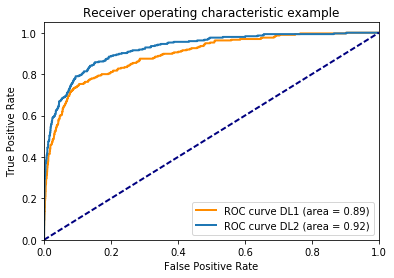

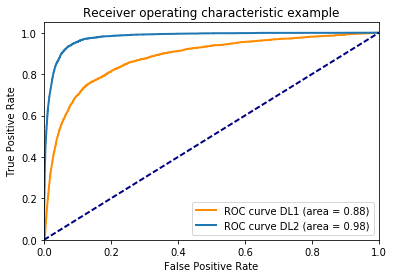

In [7]:
## Test and Score_DL1 < 0.5
plot_auc(output[(output.score_dl1 > 0.5) & (output.test)])

## Train + Test and Score_DL1 < 0.5
plot_auc(output[output.score_dl1 > 0.5])


In [ ]:
## Train + Test All
plot_auc(output)

## Test All 
plot_auc(output[output.test])

